# WeatherPy
----
## Analysis
- You can clearly see a relationship between the northern hemisphere and max temperature. The further north, the colder it get. We see a slight correlation in the southern hemisphere, with the warmest temperature being around the equator.

- I found no correlation between latitude and humidity. There did appear to be some drop in humidity between 0 and 40 degrees latitude before spiking again. Perhaps due to weather systems.

- I found no correlation between wind speed and latitude. And I found no correlation between cloudiness and latitude.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import datetime  
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=3200)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=3200)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

1055

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# url = api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}&units=imperial
base_url = 'http://api.openweathermap.org/data/2.5/weather?&appid='+weather_api_key+'&units=imperial&q=' 

# use variable to track count of cities 
cityCount = 1

# use variables to store values from api
lat_list = []
lon_list = []
temp_list = []
humidity_list = []
clouds_list = []
wind_list = []
country_list = []
date_list = []
city_list = []


print(f'Begin Data Retrevial')
print(f'------------------')

# for each city in the list attempt to get weather data
for city in cities:
    
    # attempt to get response data from open weather map api
    try:
        
        print(f'Processing Record {cityCount} | {city}')
        cityCount += 1
        url = base_url+city
        response = requests.get(url).json()

        lat = response['coord']['lat']
        lon = response['coord']['lon']
        temp = response['main']['temp_max']
        humidity = response['main']['humidity']
        clouds = response['clouds']['all']
        wind = response['wind']['speed']
        country = response['sys']['country']
        date = response['dt']
        
        #store data
        lat_list.append(lat)
        lon_list.append(lon)
        temp_list.append(temp)
        humidity_list.append(humidity)
        clouds_list.append(clouds)
        wind_list.append(wind)
        country_list.append(country)
        date_list.append(date)
        city_list.append(city)
    
    # skip city if response fails
    except:
        print(f'{city} not found. Skipping...')
        pass
    
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Begin Data Retrevial
------------------
Processing Record 1 | rikitea
Processing Record 2 | hobart
Processing Record 3 | boa viagem
Processing Record 4 | chokurdakh
Processing Record 5 | butte
Processing Record 6 | punta arenas
Processing Record 7 | ushuaia
Processing Record 8 | airai
Processing Record 9 | nouadhibou
Processing Record 10 | cidreira
Processing Record 11 | sao jose da coroa grande
Processing Record 12 | khatanga
Processing Record 13 | thompson
Processing Record 14 | nioro
Processing Record 15 | aransas pass
Processing Record 16 | bluff
Processing Record 17 | mataura
Processing Record 18 | hilo
Processing Record 19 | san cristobal
Processing Record 20 | barentsburg
barentsburg not found. Skipping...
Processing Record 21 | vaini
Processing Record 22 | sentyabrskiy
sentyabrskiy not found. Skipping...
Processing Record 23 | yellowknife
Processing Record 24 | rawson
Processing Record 25 | copiapo
Processing Record 26 | villa carlos paz
Processing Record 27 | hasaki
Processing

Processing Record 233 | arakhova
arakhova not found. Skipping...
Processing Record 234 | kaeo
Processing Record 235 | aklavik
Processing Record 236 | tuktoyaktuk
Processing Record 237 | saint george
Processing Record 238 | narsaq
Processing Record 239 | skelleftea
Processing Record 240 | nome
Processing Record 241 | saleaula
saleaula not found. Skipping...
Processing Record 242 | vardo
Processing Record 243 | fomboni
Processing Record 244 | hudson bay
Processing Record 245 | lewisporte
Processing Record 246 | nguiu
nguiu not found. Skipping...
Processing Record 247 | easley
Processing Record 248 | kyshtovka
Processing Record 249 | rehoboth
Processing Record 250 | vila franca do campo
Processing Record 251 | baillif
Processing Record 252 | marquette
Processing Record 253 | the pas
Processing Record 254 | karratha
Processing Record 255 | vostok
Processing Record 256 | krasnaya poyma
Processing Record 257 | clyde river
Processing Record 258 | cockburn town
Processing Record 259 | coihaiqu

Processing Record 454 | sao joao da barra
Processing Record 455 | port hedland
Processing Record 456 | souillac
Processing Record 457 | shimla
Processing Record 458 | okha
Processing Record 459 | kawana waters
kawana waters not found. Skipping...
Processing Record 460 | ulladulla
Processing Record 461 | muyezerskiy
Processing Record 462 | kethely
Processing Record 463 | ramanuj ganj
Processing Record 464 | bolobo
Processing Record 465 | innisfail
Processing Record 466 | dillon
Processing Record 467 | nyurba
Processing Record 468 | sikasso
Processing Record 469 | bedele
Processing Record 470 | marzuq
Processing Record 471 | shieli
Processing Record 472 | dickinson
Processing Record 473 | nadym
Processing Record 474 | wuwei
Processing Record 475 | porto velho
Processing Record 476 | selfoss
Processing Record 477 | mishelevka
Processing Record 478 | yabelo
Processing Record 479 | santa rosalia
Processing Record 480 | villa corzo
Processing Record 481 | halalo
halalo not found. Skipping...

Processing Record 684 | abu samrah
Processing Record 685 | gabuyan
Processing Record 686 | praya
Processing Record 687 | tazovskiy
Processing Record 688 | bandraboua
Processing Record 689 | flin flon
Processing Record 690 | haljala
Processing Record 691 | biloela
Processing Record 692 | mount isa
Processing Record 693 | rabaul
Processing Record 694 | tutoia
Processing Record 695 | lucea
Processing Record 696 | yinchuan
Processing Record 697 | yulara
Processing Record 698 | grootfontein
Processing Record 699 | safford
Processing Record 700 | carahue
Processing Record 701 | inta
Processing Record 702 | kanigoro
Processing Record 703 | belomorsk
Processing Record 704 | clevelandia
Processing Record 705 | north bend
Processing Record 706 | maceio
Processing Record 707 | roald
Processing Record 708 | mawlaik
Processing Record 709 | novyy urengoy
Processing Record 710 | victor rosales
Processing Record 711 | dingle
Processing Record 712 | pandharpur
Processing Record 713 | alice springs
Proc

Processing Record 917 | peniche
Processing Record 918 | mbala
Processing Record 919 | kenmare
Processing Record 920 | beloha
Processing Record 921 | gudur
Processing Record 922 | amzya
Processing Record 923 | nemuro
Processing Record 924 | moranbah
Processing Record 925 | asyut
Processing Record 926 | khartoum
Processing Record 927 | winona
Processing Record 928 | leczyca
Processing Record 929 | windsor
Processing Record 930 | quthing
Processing Record 931 | lakes entrance
Processing Record 932 | dhidhdhoo
Processing Record 933 | dymer
Processing Record 934 | merzifon
Processing Record 935 | sinnamary
Processing Record 936 | acarau
Processing Record 937 | luanda
Processing Record 938 | bacolod
Processing Record 939 | longlac
longlac not found. Skipping...
Processing Record 940 | samalaeulu
samalaeulu not found. Skipping...
Processing Record 941 | nishihara
Processing Record 942 | mana
Processing Record 943 | changping
Processing Record 944 | myshkin
Processing Record 945 | shu
Processi

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
city_df = pd.DataFrame({'City': city_list,
                        'Lat': lat_list,
                        'Lng': lon_list,
                        'Max Temp': temp_list,
                        'Humidity': humidity_list,
                        'Cloudiness': clouds_list,
                        'Wind Speed': wind_list,
                        'Country': country_list,
                        'Date': date_list
                       })

city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.1203,-134.9692,79.84,68,0,9.40,PF,1613948279
1,hobart,-42.8794,147.3294,64.40,42,20,12.66,AU,1613948294
2,boa viagem,-5.1275,-39.7322,80.69,58,33,4.52,BR,1613948534
3,chokurdakh,70.6333,147.9167,-35.21,83,26,6.91,RU,1613948303
4,butte,39.6499,-121.5677,66.99,32,1,12.66,US,1613948534


In [5]:
city_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,9.690000e+02
mean,19.768302,18.599050,50.915201,71.697626,49.861713,7.759928,1.613948e+09
std,32.275726,88.786557,31.665989,19.903029,40.441232,5.735640,1.431674e+02
min,-54.800000,-179.166700,-40.830000,9.000000,0.000000,0.070000,1.613948e+09
25%,-8.161400,-61.533300,35.600000,63.000000,2.000000,3.440000,1.613948e+09
50%,23.697700,24.728400,62.010000,77.000000,44.000000,6.170000,1.613949e+09
75%,46.646000,97.750000,75.490000,87.000000,91.000000,10.360000,1.613949e+09
max,78.218600,179.316700,91.690000,100.000000,100.000000,39.120000,1.613949e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#  Get the indices of cities that have humidity over 100%.
bad_data = city_df.loc[city_df['Humidity'] > 100].index

In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_df.drop(bad_data, inplace=False)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.1203,-134.9692,79.84,68,0,9.40,PF,1613948279
1,hobart,-42.8794,147.3294,64.40,42,20,12.66,AU,1613948294
2,boa viagem,-5.1275,-39.7322,80.69,58,33,4.52,BR,1613948534
3,chokurdakh,70.6333,147.9167,-35.21,83,26,6.91,RU,1613948303
4,butte,39.6499,-121.5677,66.99,32,1,12.66,US,1613948534


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [8]:
# Get today's date
# using now() to get current time  
current_time = datetime.datetime.now()  
year = current_time.year
month = current_time.month
day = current_time.day
date = "-".join([str(month),str(day),str(year)])

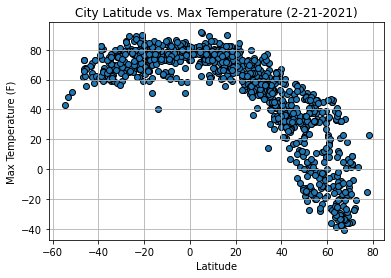

In [9]:
# latitude vs. temperature scatter plot
plt.scatter(clean_city_data['Lat'], 
            clean_city_data['Max Temp'],
            edgecolor="black", linewidths=1, marker="o")

# add labels, titles, etc.
plt.title(f"City Latitude vs. Max Temperature ({date})")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the plot
plt.savefig("output_data/latVStemp.png")

# Show plot
plt.show()

This plot shows the relationship between lattitude and the highest temperature on a single day.
In this case it shows it colder in the north (positive latitude) than it is in the south (negative latitude).

## Latitude vs. Humidity Plot

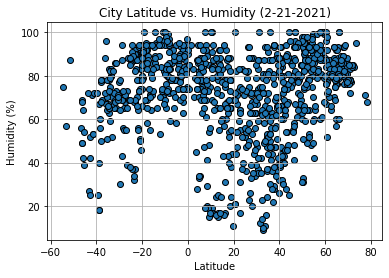

In [10]:
# latitude vs. humidity scatter plot
plt.scatter(clean_city_data['Lat'], 
            clean_city_data['Humidity'],
            edgecolor="black", linewidths=1, marker="o")

# add labels, titles, etc.
plt.title(f"City Latitude vs. Humidity ({date})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the plot
plt.savefig("output_data/lat_VS_humidity.png")

# Show plot
plt.show()

This plot shows the relationship between lattitude and the humidity on a single day.
In this case there does not appear to be a strong correlation between latitude and humidity.

## Latitude vs. Cloudiness Plot

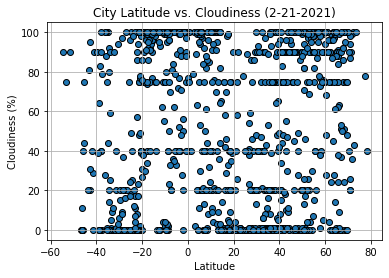

In [11]:
# latitude vs. cloudiness scatter plot
plt.scatter(clean_city_data['Lat'], 
            clean_city_data['Cloudiness'],
            edgecolor="black", linewidths=1, marker="o")

# add labels, titles, etc.
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the plot
plt.savefig("output_data/lat_VS_cloudiness.png")

# Show plot
plt.show()

This plot shows the relationship between lattitude and the cloudiness on a single day. In this case there does not appear to be a strong correlation between latitude and cloudiness.

## Latitude vs. Wind Speed Plot

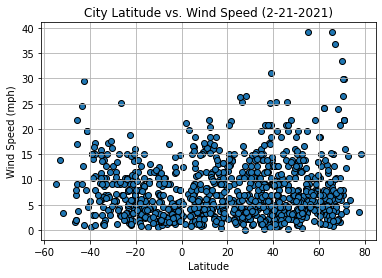

In [12]:
# latitude vs. wind speed scatter plot
plt.scatter(clean_city_data['Lat'], 
            clean_city_data['Wind Speed'],
            edgecolor="black", linewidths=1, marker="o")

# add labels, titles, etc.
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the plot
plt.savefig("output_data/lat_VS_windSpeed.png")

# Show plot
plt.show()

This plot shows the relationship between lattitude and the wind speed on a single day. In this case there does not appear to be a strong correlation between latitude and wind speed.

## Linear Regression

In [13]:
# linear regression calculation & plot function
def lin_regress(x_values, y_values, ylabel, text_coordinates):
    
    # calculate regression value
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regression_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # create scatter plot
    plt.scatter(x_values,y_values)
    
    # create regession line & display equation
    plt.plot(x_values,regression_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    
    # add axis & plot titles
    plt.xlabel('Latitude')
    plt.ylabel(ylabel)
    
    # print r value
    print(f'The r-value is: {rvalue**2}')
    plt.show()

In [14]:
north_hem = clean_city_data.loc[(clean_city_data["Lat"] >= 0)]
south_hem = clean_city_data.loc[(clean_city_data["Lat"] < 0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7334821656778423


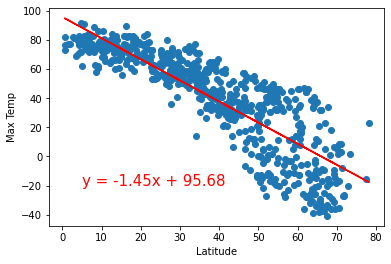

In [23]:
lin_regress(north_hem['Lat'], north_hem['Max Temp'], 'Max Temp', (5,-20))

The high r-value indicates a strong correlation between max temperature and latitude. The correlation in this case is negative. The further north, the lower the temperature

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.15912844798311798


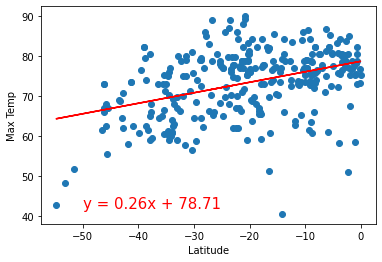

In [24]:
lin_regress(south_hem['Lat'], south_hem['Max Temp'], 'Max Temp', (-50,42))

The low r-value does not indicate a strong correlation between max temperature and latitude.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.08837108044692962


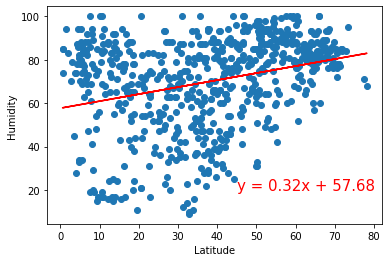

In [25]:
lin_regress(north_hem['Lat'], north_hem['Humidity'], 'Humidity', (45,20))

The low r-value show little or no correlation between humidity and latitude.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.23192850224581055


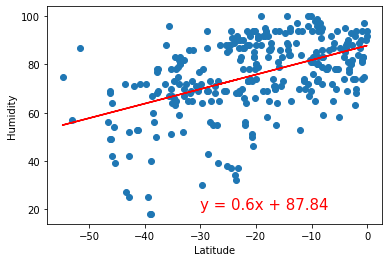

In [26]:
lin_regress(south_hem['Lat'], south_hem['Humidity'], 'Humidity', (-30,20))

The low r-value suggests a weak correlation between humidity and latitude.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.04124251095164068


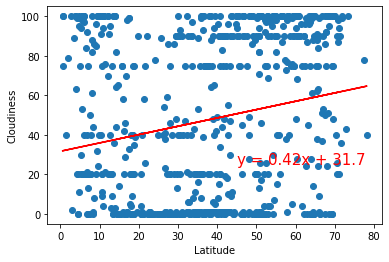

In [27]:
lin_regress(north_hem['Lat'], north_hem['Cloudiness'], 'Cloudiness', (45,25))

The low r-value suggests a weak correlation between cloudiness and latitude.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.13372292209478068


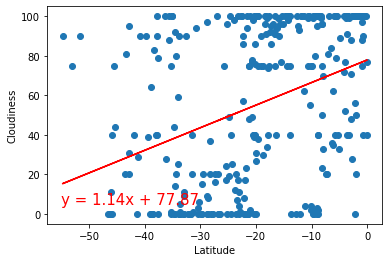

In [28]:
lin_regress(south_hem['Lat'], south_hem['Cloudiness'], 'Cloudiness', (-55,5))

The low r-value suggests a weak correlation between cloudiness and latitude.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.004520535714879992


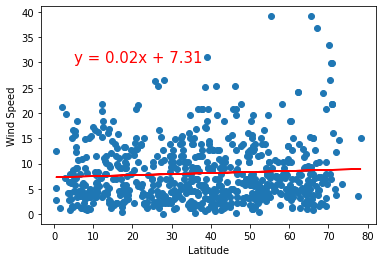

In [32]:
lin_regress(north_hem['Lat'], north_hem['Wind Speed'], 'Wind Speed', (5,30))

The low r-value suggests a weak correlation between wind speed and latitude.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.10408017860727457


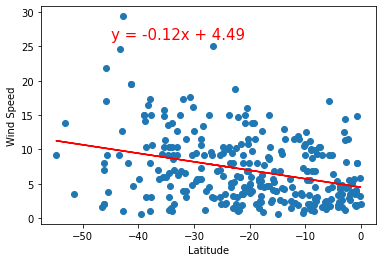

In [33]:
lin_regress(south_hem['Lat'], south_hem['Wind Speed'], 'Wind Speed', (-45,26))

The low r-value suggests a weak correlation between wind speed and latitude.